$$ \text{Digit Classification : Hello World of Neural Networks} $$

**How this shit Works :**
$$
\begin{aligned}
1. & \quad \text{Get the data (e.g., MNIST for digit classification).} \\
2. & \quad \text{Normalize the data (scale pixel values between 0 and 1).} \\
3. & \quad \text{Decide the number of layers and initialize weights randomly.} \\
4. & \quad \text{Choose activation functions (e.g., ReLU for hidden layers, Softmax for output layer).} \\
5. & \quad \text{Select a cost function (e.g., Multi-class Cross-Entropy Loss).} \\
6. & \quad \text{Compute the gradient of the cost function with respect to the weights using the chain rule.} \\
7. & \quad \text{Update weights using an optimization algorithm (e.g., Stochastic Gradient Descent, Backpropagation).} \\
8. & \quad \text{Repeat the process for multiple epochs until convergence.} \\
9. & \quad \text{Evaluate the trained model on test data and fine-tune if necessary.}
\end{aligned}
$$

**Importing all necessary libraries and packages**

In [48]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist # type: ignore
import matplotlib.pyplot as plt

**Splitting the data**

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


**Normalization** 

**Why is Normalization Used?**
$$\text{Raw pixel values in the MNIST dataset range from 0 to 255 (since images are grayscale).}\\
\text{Neural networks work best when input values are small and centered around zero.}
$$

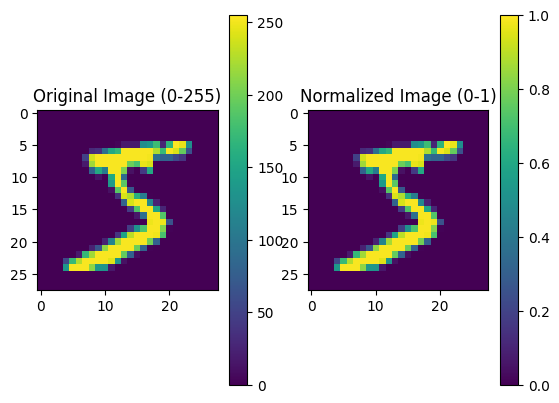

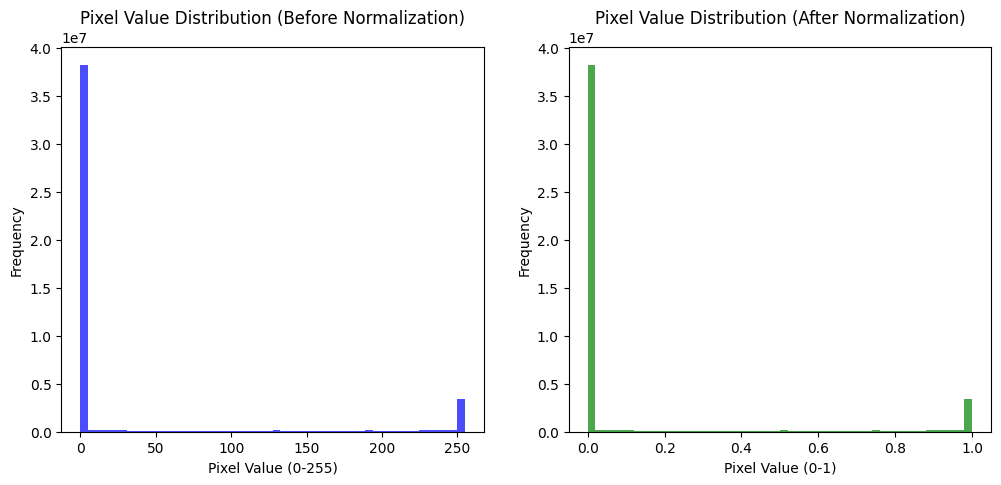

In [50]:



sample_image = x_train[0]
normalized_image = sample_image/255.0
plt.subplot(1, 2, 1)
plt.imshow(sample_image )
plt.title("Original Image (0-255)")
plt.colorbar()

# Normalized Image (0-1)
plt.subplot(1, 2, 2)
plt.imshow(normalized_image)
plt.title("Normalized Image (0-1)")
plt.colorbar()

plt.show()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(x_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Value Distribution (Before Normalization)")
plt.xlabel("Pixel Value (0-255)")
plt.ylabel("Frequency")


x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

plt.subplot(1, 2, 2)
plt.hist(x_train.flatten(), bins=50, color='green', alpha=0.7)
plt.title("Pixel Value Distribution (After Normalization)")
plt.xlabel("Pixel Value (0-1)")
plt.ylabel("Frequency")

plt.show()



# **Label Encoding vs One-Hot Encoding**

## **1️⃣ Label Encoding**
Label Encoding assigns a **unique number** to each category.

Example:
- Cat → **0**
- Dog → **1**
- Elephant → **2**

⚠️ **Problem:** The model might think **2 > 1 > 0**, which is incorrect.

---

## **2️⃣ One-Hot Encoding**
One-Hot Encoding converts categories into **binary vectors**.

Example:

| Label   | One-Hot Encoding |
|---------|-----------------|
| Cat     | **[1, 0, 0]**   |
| Dog     | **[0, 1, 0]**   |
| Elephant| **[0, 0, 1]**   |

✔️ **Advantage:** No **order relationship** between labels.

---

## **Why Use One-Hot in MNIST?**
MNIST has digits **0-9**. Instead of:

$$
\{ 0, 1, 2, 3, ..., 9 \}
$$

We use:

$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\vdots \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

### **✅ Benefits of One-Hot Encoding in MNIST:**
- Prevents the model from **thinking 9 > 0**.
- Works better for **classification tasks**.
- Used with **Softmax Activation** for probabilities.

In [51]:
y_train = np.identity(10)[y_train.astype(int)]
y_test = np.identity(10)[y_test.astype(int)]

****Neural Network Initialization Explanation****

$$
\textbf{Neural Network Architecture:}
$$

- **Input Layer**: 784 neurons (corresponding to \( 28 \times 28 \) pixels in MNIST)
- **Hidden Layer 1**: 256 neurons
- **Hidden Layer 2**: 128 neurons
- **Output Layer**: 10 neurons (corresponding to digit classes 0-9)



In [52]:
input_size = 784  
hidden_size1 = 256 
hidden_size2 = 128 
output_size = 10  
learning_rate = 0.5
epochs = 100
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2.0 / input_size)
b1 = np.zeros((1, hidden_size1))
W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2.0 / hidden_size1)
b2 = np.zeros((1, hidden_size2))
W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2.0 / hidden_size2)
b3 = np.zeros((1, output_size))
# W1 = np.random.randn(input_size, hidden_size1)*2
# b1 = np.zeros((1, hidden_size1))
# W2 = np.random.randn(hidden_size1, hidden_size2) *2
# b2 = np.zeros((1, hidden_size2))
# W3 = np.random.randn(hidden_size2, output_size)*2
# b3 = np.zeros((1, output_size))

**why Activation function ?**
$$
\text{It introduces non linearity to the network }
$$
**Why is Non-Linearity Needed in Neural Networks?**
$$
\text{Neural networks must be non-linear to learn complex patterns and solve real-world problems like image recognition, language translation, and medical diagnostics.}\\
\text{If we only used linear functions, deep neural networks would be no more powerful than a single-layer perceptron}
$$

**ReLU Function**
$$
\text{ReLU}(x) =
\begin{cases}
x, & \text{if } x > 0 \\
0, & \text{if } x \leq 0
\end{cases}
$$

**Derivative of ReLU**
$$
\frac{d}{dx} \text{ReLU}(x) =
\begin{cases}
1, & \text{if } x > 0 \\
0, & \text{if } x \leq 0
\end{cases}
$$

**Softmax Function**
$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

**Derivative of Softmax**
$$
\frac{\partial \text{Softmax}(z_i)}{\partial z_j} =
\text{Softmax}(z_i) \left( \delta_{ij} - \text{Softmax}(z_j) \right)
$$



**Why Relu**
$$
\text{Unlike Sigmoid or Tanh, ReLU does not squash values into a small range (0 to 1 or -1 to 1)}\\
\text{ which helps gradients flow better and avoids the vanishing gradient problem during backpropagation.}
$$

In [53]:
def relu(x):
    return np.maximum(0, x)

**Why SoftMax**
$$
\text{Softmax takes the raw output (logits) from the last layer and converts them into a probability distribution}
$$

In [54]:
def softmax(x):
    x = x - np.max(x, axis=1, keepdims=True) 
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

**Cross-Entropy Loss for Binary Classification**
$$
\mathcal{L} = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

**Cross-Entropy Loss for Multi-Class Classification**
$$
\mathcal{L} = - \sum_{i=1}^{n} \sum_{j=1}^{k} y_{i,j} \log(\hat{y}_{i,j})
$$

**Why Do We Need a Cost Function in Machine Learning?**
$$\text{In Neural Networks (NNs), the cost function (CF) measures the difference between the actual and predicted outputs.}\\
\text{ It is used to guide the learning process by optimizing weights and biases using backpropagation and gradient descent.}
$$

$$

L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})\\


\text{Where}:\\
	•	 N  = \text{number of samples (batch size)}\\
	•	C  =  \text{number of classes (10 for MNIST)}\\
	•	y_{ij}  =  \text{actual (true) label in one-hot encoded format}\\
	•	\hat{y}  = \text{predicted probability from Softmax output}\\
	•	\log(\hat{y}_{ij})  =  \text{log of predicted probability to measure confidence}\\
$$

In [55]:
def compute_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10) 
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

**Gradient Calculation**
$$
1 -> \text{What is gradient Decent}\\
2 -> \text{Maths of gradient Decent}\\
3 -> \text{Why do we use learning rate}\\
$$

**What is Gradient Decent ?**
$$
\text{Gradient Descent is an optimization algorithm used to minimize a cost function by iteratively adjusting the model’s parameters in the direction of the steepest descent.}$$

**Maths of Gradient Decent**
$$
\text{Cost Function } =\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2\\
	•	 y_i  = \text{actual value}\\
	•	 \hat{y}_i =\text{ m*x + c  = predicted value}\\
	•	 n  = \text{number of data points}\\
\text{To find the direction of steepest decent partial derivatives are use}\\

$$

$$

 w = w - LearningRate \frac{\partial Cost Function}{\partial w}$$

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2\\



\frac{\partial MSE}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - (mx_i + c))\\



\frac{\partial MSE}{\partial c} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (mx_i + c))\\
$$

**Use Of Learning Rate**
$$
\text{The learning rate in Gradient Descent determines how big the steps are when updating the model’s parameters (weights and biases) in the direction of the negative gradient.}
$$

**Backpropagation**
$$
\text{Backpropagation (BackProp) is the core algorithm that trains deep neural networks by adjusting weights using Gradient Descent. }\\
\text{It computes how much each weight contributes to the error and updates them to minimize the loss.}
$$

**BackPropSteps**
$$
1 -> \text{Forward Propagation}\\
2 -> \text{Compute Gradients}\\
3 -> \text{Weight Updates Using Gradient Descent}
$$

**Forward Propagation**
$$
\text{Each neuron computes:}\\

z = wX + b\\


a = f(z)\\

\text{where:}\\
	•	\text{ X  = Input}\\
	•	 \text{w  = Weight}\\
	•	 \text{b  = Bias}\\
	•	 \text{z  = Weighted sum}\\
	•	 \text{f(z)  = Activation function}\\
	•	 \text{a  = Output (activation)}
$$

**BackProp Math**
$$
\textbf{Definitions:}
$$

\begin{aligned}
    C &= \text{Cost function, measures the error of the model} \\[10pt]
    L &= \text{Layer number in the neural network} \\[10pt]
    Z^{(L)} &= W^{(L)} A^{(L-1)} + b^{(L)}, \quad \text{(Linear transformation before activation)} \\[10pt]
    A^{(L)} &= f(Z^{(L)}), \quad \text{(Activation function applied to } Z^{(L)}\text{)} \\[10pt]
    W^{(L)} &= \text{Weight matrix connecting layer } L-1 \text{ to } L \\[10pt]
    b^{(L)} &= \text{Bias term for layer } L
\end{aligned}
$$
\frac{\partial C}{\partial W_2} =
\underbrace{\frac{\partial z^{(L1)}}{\partial W_2}}_{\text{How z(L1) changes w.r.t } W_2} 
\cdot 
\underbrace{\frac{\partial A^{(L1)}}{\partial z^{(L1)}}}_{\text{Derivative of Activation Function}} 
\cdot 
\underbrace{\frac{\partial C^{(L1)}}{\partial A^{(L1)}}}_{\text{How Cost changes w.r.t } A^{(L1)}}
$$

**Derivative of the activation function**
$$
\frac{\partial A^{(L1)}}{\partial z^{(L1)}} =
\begin{cases} 
\underbrace{\sigma(z^{(L1)}) (1 - \sigma(z^{(L1)}))}_{\text{Sigmoid Derivative}}, & \text{if } A^{(L1)} = \sigma(z^{(L1)}) \text{ (Sigmoid)} \\[10pt]
\underbrace{1 - \tanh^2(z^{(L1)})}_{\text{Tanh Derivative}}, & \text{if } A^{(L1)} = \tanh(z^{(L1)}) \text{ (Tanh)} \\[10pt]
\begin{cases} 
1, & z^{(L1)} > 0 \\ 
0, & z^{(L1)} \leq 0
\end{cases}, & \text{if } A^{(L1)} = \max(0, z^{(L1)}) \text{ (ReLU)}
\end{cases}
$$

In [56]:
def forward_propagation(x):
    z1 = x.dot(W1) + b1
    a1 = relu(z1)
    z2 = a1.dot(W2) + b2
    a2 = relu(z2)
    z3 = a2.dot(W3) + b3
    a3 = softmax(z3)
    return z1, a1, z2, a2, z3, a3

In [57]:
def backward_propagation(x, y_true, z1, a1, z2, a2, a3):
    global W1, b1, W2, b2, W3, b3
    
    m = y_true.shape[0]
    dz3 = a3 - y_true
    dW3 = (1/m) * a2.T.dot(dz3)
    db3 = (1/m) * np.sum(dz3, axis=0, keepdims=True)
    
    dz2 = dz3.dot(W3.T) * (z2 > 0)
    dW2 = (1/m) * a1.T.dot(dz2)
    db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
    
    dz1 = dz2.dot(W2.T) * (z1 > 0)
    dW1 = (1/m) * x.T.dot(dz1)
    db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
    
    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

In [58]:
for epoch in range(epochs):
    z1, a1, z2, a2, z3, a3 = forward_propagation(x_train)
    loss = compute_loss(y_train, a3)
    backward_propagation(x_train, y_train, z1, a1, z2, a2, a3)
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

# Evaluate on test data
def predict(x):
    _, _, _, _, _, a3 = forward_propagation(x)
    return np.argmax(a3, axis=1)

y_pred = predict(x_test)
y_true = np.argmax(y_test, axis=1)
print(y_pred,y_true)
accuracy = np.mean(y_pred == y_true)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 5/100, Loss: 1.7686
Epoch 10/100, Loss: 1.1667
Epoch 15/100, Loss: 2.1665
Epoch 20/100, Loss: 0.6592
Epoch 25/100, Loss: 1.0609
Epoch 30/100, Loss: 0.4473
Epoch 35/100, Loss: 0.3964
Epoch 40/100, Loss: 0.4973
Epoch 45/100, Loss: 0.4310
Epoch 50/100, Loss: 0.3384
Epoch 55/100, Loss: 0.3188
Epoch 60/100, Loss: 0.3615
Epoch 65/100, Loss: 0.2866
Epoch 70/100, Loss: 0.2607
Epoch 75/100, Loss: 0.2499
Epoch 80/100, Loss: 0.2410
Epoch 85/100, Loss: 0.2338
Epoch 90/100, Loss: 0.2300
Epoch 95/100, Loss: 0.2467
Epoch 100/100, Loss: 0.2746
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Test Accuracy: 91.13%


0


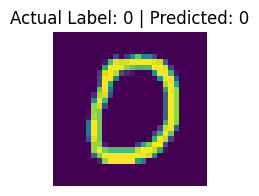

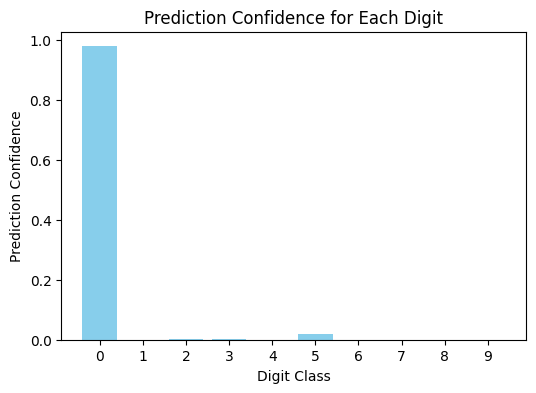

In [69]:
index =10
image = x_test[index]
testImage = image
image  = image.reshape(28,28)
label = y_test[index].argmax()
_,_,_,_,_,ans= forward_propagation(testImage)
print(ans.argmax())
plt.figure(figsize=(6, 2))
plt.imshow(image)
plt.title(f"Actual Label: {label} | Predicted: {ans.argmax()}")
plt.axis('off')  # Hide axis
plt.show()

# Plot probability distribution as a bar graph
categories = np.arange(10)  # Digits 0-9
plt.figure(figsize=(6, 4))
plt.bar(categories, ans.flatten(), color='skyblue')
plt.xticks(categories)
plt.xlabel("Digit Class")
plt.ylabel("Prediction Confidence")
plt.title("Prediction Confidence for Each Digit")
plt.show()